In [1]:
import numpy as np
from multi_armed_bandit.reward_functions import Rewards
from multi_armed_bandit.algorithms import GSR

from matplotlib import pyplot as plt

In [2]:
mean_type = 'one_hot'
noise_type = 'pareto'
p = 1.1
scale = 0.1
K = 10
       
samples = 5000*K

if mean_type == 'one_hot':
    gap= 0.3
    means = np.ones(K)
    means[:K-1]-=gap
elif mean_type == 'random':
    means = np.random.uniform(-1, 1, K)
elif mean_type == 'sequence':
    means = np.linspace(0, 1., k)
    
rewards_generator = Rewards(means,p,scale,noise_type)
nu = rewards_generator.nu

algos = [GSR(K, p, nu, T=samples, q=0.01),
         GSR(K, p, nu, T=samples, q=0.5),
         GSR(K, p, nu, T=samples, q=0.9)]

regret_list = [[] for _ in range(len(algos))]
agv_regret_list = [[] for _ in range(len(algos))]
action_cnt = [np.zeros(K) for _ in range(len(algos))]

for step in range(samples):
    rewards = rewards_generator.get_observations()

    for alg_idx, algo in enumerate(algos):
        a = algo.choose(step)
        r = rewards[a]
        algo.update(a,r,step)
        regret = np.max(means)- means[a]
        regret_list[alg_idx].append(regret)
        agv_regret_list[alg_idx].append(np.mean(regret_list[alg_idx]))
        action_cnt[alg_idx][a]+=1

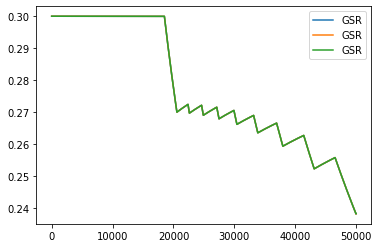

In [3]:
# plt.plot(gap*np.arange(samples))
for alg_idx, algo in enumerate(algos):
    plt.plot(agv_regret_list[alg_idx][K:], label="GSR")
#     plt.plot(np.cumsum(regret_list[alg_idx][K:]), label=algo.estimator_type)
# plt.ylim([0.0,0.1])
plt.legend()
plt.show()